In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

# For surfvel data in tif files
import rasterio
from rasterio.transform import from_origin

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
xModel10 = np.arange(-72.,97.,1.0)*10
yModel10 = np.arange(-345.,-56.,1.0)*10
xModel16 = np.arange(-72.,97.,1.6)*10
yModel16 = np.arange(-345.,-56.,1.6)*10
xModel40 = np.arange(-72.,97.,4.0)*10
yModel40 = np.arange(-345.,-56.,4.0)*10

dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')

# !rm /scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc
# ds_age_correct = ageData.correctAgeDataset(ds_age,
#                             path = dataPath,
#                             filename = 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc',
#                             zetaLevels = 26,
#                             unCorrupt = True)
ds_age_correct = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
ds_bm5 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/BedMachineGreenland-v5.nc")
ds_bm5_orig = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms_orig.nc")
ds_age_old = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms_old.nc")
H_orig = ds_bm5_orig["H"].data

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')
H_model = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["H"].data
cell_area_model = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp["cell_area"].data

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['grid_mapping'] = 'mapping'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['standard_name'] = 'land_ice_thickness_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['long_name'] = 'Ice thickness uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs']*0.0 + 5.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['standard_name'] = 'land_ice_surface_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['long_name'] = 'Ice surface uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].copy()
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['standard_name'] = 'land_ice_bed_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['long_name'] = 'Ice bed uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_age_data_40kms.nc', mode='w')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_bm5_data_40kms.nc', mode='w')

In [3]:
def frac_area(x, y, xx, yy):
    """
    Compute the fraction of the area of the small rectangle (xx, yy)
    within the large rectangle (x, y).

    Parameters:
        x, y:   Length-2 arrays for the large rectangle [x1, x2], [y1, y2]
        xx, yy: Length-2 arrays for the small rectangle

    Returns:
        Fraction of area of (xx, yy) within (x, y)
    """

    x = sorted(x)
    y = sorted(y)
    xx = sorted(xx)
    yy = sorted(yy)

    dx_inv = 1.0 / (x[1] - x[0])
    dy_inv = 1.0 / (y[1] - y[0])

    # Normalize coordinates of small rectangle to large rectangle frame
    xxm = (np.array(xx) - x[0]) * dx_inv
    yym = (np.array(yy) - y[0]) * dy_inv

    # Error check: small rectangle should not be larger than the big one
    if (xx[1] - xx[0] > x[1] - x[0]) or (yy[1] - yy[0] > y[1] - y[0]):
        raise ValueError("Small rectangle larger than large rectangle!")

    # Fully inside
    if 0 <= xxm[0] and xxm[1] <= 1 and 0 <= yym[0] and yym[1] <= 1:
        return 1.0

    # Edge overlap cases
    if 0 <= xxm[0] and xxm[1] <= 1:
        if yym[0] < 0 < yym[1]:
            return yym[1] / (yym[1] - yym[0])
        elif yym[0] < 1 < yym[1]:
            return (1 - yym[0]) / (yym[1] - yym[0])
        else:
            return 0.0

    if 0 <= yym[0] and yym[1] <= 1:
        if xxm[0] < 0 < xxm[1]:
            return xxm[1] / (xxm[1] - xxm[0])
        elif xxm[0] < 1 < xxm[1]:
            return (1 - xxm[0]) / (xxm[1] - xxm[0])
        else:
            return 0.0

    # Corner overlap cases
    denom = (xxm[1] - xxm[0]) * (yym[1] - yym[0])
    if denom == 0:
        return 0.0

    if xxm[0] < 0 < xxm[1] and yym[0] < 0 < yym[1]:
        return xxm[1] * yym[1] / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 0 < yym[1]:
        return (1 - xxm[0]) * yym[1] / denom
    if xxm[0] < 0 < xxm[1] and yym[0] < 1 < yym[1]:
        return xxm[1] * (1 - yym[0]) / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 1 < yym[1]:
        return (1 - xxm[0]) * (1 - yym[0]) / denom

    return 0.0

# -----------------------------
# Area-weighted downsampling (H)
def downsample_H(H_hr, x_hr, y_hr, x_lr, y_lr, dx_lr, dx_hr):
    """
    Downsample high-resolution H field from age data grid to a 
    coarser SICOPOLIS (sico) grid using area-weighted interpolation.

    Parameters:
        H_hr: H data from age data nc file (high resolution)
        x_hr, y_hr: 1D arrays of age data grid coordinates
        x_lr, y_lr: 1D arrays of coarse sico grid coordinates
        dx_lr: spacing of sico grid (same for x and y)
        dx_hr: horizontal resolution of age data grid (same for x and y)
    Returns:
        H_lr: downsampled H field
    """

    shape = (len(y_lr), len(x_lr))
    H_lr = np.zeros(shape)

    for j, y in enumerate(y_lr):
        for i, x in enumerate(x_lr):

            # Handle points outside age data domain as ocean
            if x < x_hr[0] or x > x_hr[-1] or y < y_hr[0] or y > y_hr[-1]:
                continue

            # Define bounding box around current coarse cell
            x1, x2 = x - 0.5*(dx_lr + dx_hr), x + 0.5*(dx_lr + dx_hr)
            y1, y2 = y - 0.5*(dx_lr + dx_hr), y + 0.5*(dx_lr + dx_hr)

            # Convert bounding box to index range in BedMachine grid
            ii1 = int(np.floor((x1 - x_hr[0]) / dx_hr))
            ii2 = int(np.ceil((x2 - x_hr[0]) / dx_hr))
            jj1 = int(np.floor((y1 - y_hr[0]) / dx_hr))
            jj2 = int(np.ceil((y2 - y_hr[0]) / dx_hr))

            H_sum = 0.0
            w_sum = 0.0

            # Loop over overlapping fine grid cells
            for jj in range(jj1, jj2):
                for ii in range(ii1, ii2):
                    if 0 <= ii < len(x_hr) and 0 <= jj < len(y_hr):
                        w = frac_area(
                            [x - 0.5*dx_lr, x + 0.5*dx_lr],
                            [y - 0.5*dx_lr, y + 0.5*dx_lr],
                            [x_hr[ii] - 0.5*dx_hr, x_hr[ii] + 0.5*dx_hr],
                            [y_hr[jj] - 0.5*dx_hr, y_hr[jj] + 0.5*dx_hr]
                        )
                        H_sum += w * H_hr[jj, ii]
                        w_sum += w

            # Normalize sums by total weight to get downsampled values
            if w_sum > 0:
                H_lr[j, i] = H_sum / w_sum

    return H_lr

# -----------------------------
# Downsample 3D fields
def downsample_3d_field(field_hr, x_hr, y_hr, x_lr, y_lr, dx_lr, coverage_thresh=0.5):
    """
    Downsample high-resolution 3D fields from age data grid to a 
    coarser SICOPOLIS (sico) grid using area-weighted interpolation.

    Parameters:
        field_hr: high resolution 3D field from age_data
        x_hr, y_hr: 1D arrays of age data grid coordinates
        x_lr, y_lr: 1D arrays of coarse sico grid coordinates
        dx_lr: spacing of sico grid (same for x and y)
        coverage_thresh:
    Returns:
        field_lr: downsampled 3D field (in 2D sense it's downsampled)
    """

    nz = field_hr.shape[0]
    field_lr = np.full((nz, len(y_lr), len(x_lr)), np.nan)
    dx_hr = x_hr[1] - x_hr[0]

    for j, y in enumerate(y_lr):
        for i, x in enumerate(x_lr):

            # Handle points outside age data domain as ocean
            if x < x_hr[0] or x > x_hr[-1] or y < y_hr[0] or y > y_hr[-1]:
                continue

            # Define bounding box around current coarse cell
            x1, x2 = x - 0.5*(dx_lr + dx_hr), x + 0.5*(dx_lr + dx_hr)
            y1, y2 = y - 0.5*(dx_lr + dx_hr), y + 0.5*(dx_lr + dx_hr)

            # Convert bounding box to index range in BedMachine grid
            ii1 = int(np.floor((x1 - x_hr[0]) / dx_hr))
            ii2 = int(np.ceil((x2 - x_hr[0]) / dx_hr))
            jj1 = int(np.floor((y1 - y_hr[0]) / dx_hr))
            jj2 = int(np.ceil((y2 - y_hr[0]) / dx_hr))

            # Loop over overlapping fine grid cells
            for k in range(nz):
                v_sum = 0.0
                w_sum = 0.0

                for jj in range(jj1, jj2):
                    for ii in range(ii1, ii2):
                        if 0 <= ii < len(x_hr) and 0 <= jj < len(y_hr):
                            val = field_hr[k, jj, ii]
                            # Count_valid only increments if it's not NaN
                            if np.isfinite(val):
                                w = frac_area(
                                    [x - 0.5*dx_lr, x + 0.5*dx_lr],
                                    [y - 0.5*dx_lr, y + 0.5*dx_lr],
                                    [x_hr[ii] - 0.5*dx_hr, x_hr[ii] + 0.5*dx_hr],
                                    [y_hr[jj] - 0.5*dx_hr, y_hr[jj] + 0.5*dx_hr]
                                )
                                v_sum += w * val
                                w_sum += w

                # Accept only if enough area is covered
                if w_sum > 0 and (w_sum >= coverage_thresh):
                    field_lr[k, j, i] = v_sum / w_sum

    return field_lr

In [4]:
# Flip BedMachine y-axis
y_bm = ds_bm5["y"].values[::-1] / 1000.0
x_bm = ds_bm5["x"].values / 1000.0

# Extract age grid
x_age = ds_age_correct["xMesh"].values[0]
y_age = ds_age_correct["yMesh"].values[:, 0]
dx_age = x_age[1] - x_age[0]
dx_bm = x_bm[1] - x_bm[0]

# Load high-res data
age_hr = ds_age_correct["age_c"].values  # shape: (nz, ny_hr, nx_hr)
age_uncert_hr = ds_age_correct["age_c_uncert"].values
H_hr = ds_age_correct["H"].values      # shape: (ny_hr, nx_hr)

# Define low-res target grid (e.g., from SICOPOLIS)
x_sico = np.arange(-720, 960 + 40, 40)  # in km
y_sico = np.arange(-3450, -570 + 40, 40)
dx_sico = 40.0  # km

# Downsample H using area-weighted average
H_lr = downsample_H(H_hr, x_age, y_age, x_sico, y_sico, dx_sico, dx_age)

# Downsample age and age_uncert
age_lr = downsample_3d_field(
    age_hr, x_age, y_age, x_sico, y_sico, dx_sico, coverage_thresh=0.5
)

age_uncert_lr = downsample_3d_field(
    age_uncert_hr, x_age, y_age, x_sico, y_sico, dx_sico, coverage_thresh=0.5
)

print("Downsampling complete.")

age_lr_withNaNs_26layers = age_lr.copy()
age_uncert_lr_withNaNs_26layers = age_uncert_lr.copy()

def print_stats(arr, name, H_orig, thresh=1500.0):
    print(f"{name} stats:")
    print("  Total NaNs: ", np.sum(np.isnan(arr)))
    print("  Total valid: ", np.sum(np.isfinite(arr)))
    print("  Nonnegative: ", np.nansum(arr >= 0))
    print("  High-H (>= {:.0f}) NaNs: ".format(thresh), np.sum(np.isnan(arr) & (H_orig[None, :, :] >= thresh)))
    print("  High-H valid: ", np.sum(np.isfinite(arr) & (H_orig[None, :, :] >= thresh)))
    print("  High-H >= 0: ", np.nansum((arr >= 0) & (H_orig[None, :, :] >= thresh)))

print("age_lr before and after stats")
print_stats(age_lr, "age_lr", H_orig)
for j in range(len(y_sico)):
    for i in range(len(x_sico)):
        age_lr[:, j, i] = ageData.interpolate_nans(age_lr[:, j, i], bool_uncert = False)
print_stats(age_lr, "age_lr", H_orig)

print("age_uncert_lr before and after stats")
print_stats(age_uncert_lr, "age_uncert_lr", H_orig)
for j in range(len(y_sico)):
    for i in range(len(x_sico)):
        age_uncert_lr[:, j, i] = ageData.interpolate_nans(age_uncert_lr[:, j, i], bool_uncert = False)
print_stats(age_uncert_lr, "age_uncert_lr", H_orig)

print("NaNs removal complete.")

age_lr_withlessNaNs_26layers = age_lr.copy()
age_uncert_lr_withlessNaNs_26layers = age_uncert_lr.copy()

Downsampling complete.
age_lr before and after stats
age_lr stats:
  Total NaNs:  58407
  Total valid:  23207
  Nonnegative:  23207
  High-H (>= 1500) NaNs:  915
  High-H valid:  15751
  High-H >= 0:  15751
age_lr stats:
  Total NaNs:  58119
  Total valid:  23495
  Nonnegative:  23495
  High-H (>= 1500) NaNs:  911
  High-H valid:  15755
  High-H >= 0:  15755
age_uncert_lr before and after stats
age_uncert_lr stats:
  Total NaNs:  60030
  Total valid:  21584
  Nonnegative:  21584
  High-H (>= 1500) NaNs:  2236
  High-H valid:  14430
  High-H >= 0:  14430
age_uncert_lr stats:
  Total NaNs:  58358
  Total valid:  23256
  Nonnegative:  23256
  High-H (>= 1500) NaNs:  1084
  High-H valid:  15582
  High-H >= 0:  15582
NaNs removal complete.


In [5]:
age_lr[-1, :, 20], \
age_uncert_lr[-1, :, 20], \
age_lr[:, 15, 20], \
age_lr[:, 10, 20], \
age_uncert_lr[:, 15, 20], \
age_uncert_lr[:, 10, 20], \
y_sico

(array([nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., nan, nan, nan]),
 array([nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1., nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.]),
 array([nan, nan, nan,

In [6]:
i = 6
np.nansum(age_lr_withNaNs_26layers[i]) - np.nansum(age_lr_withlessNaNs_26layers[i])

-24944.760832168162

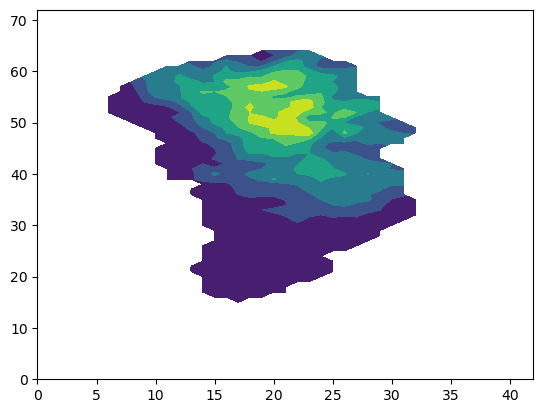

In [7]:
plt.contourf(age_lr_withNaNs_26layers[6])

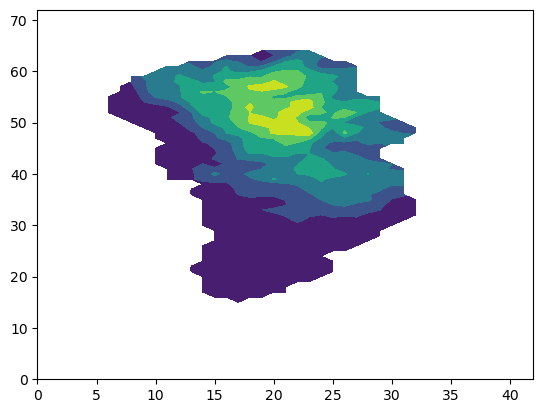

In [8]:
plt.contourf(age_lr_withlessNaNs_26layers[6])

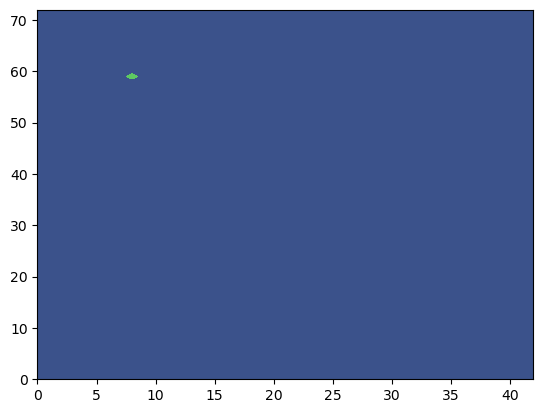

In [9]:
plt.contourf(~np.isnan(age_lr_withlessNaNs_26layers[6]) & np.isnan(age_lr_withNaNs_26layers[6]))

In [10]:
np.sum(H_lr*cell_area_model), np.sum(H_orig*cell_area_model), np.sum(H_model*cell_area_model)

(2991933106468114.0, 2978792000000000.0, 2967522800000000.0)

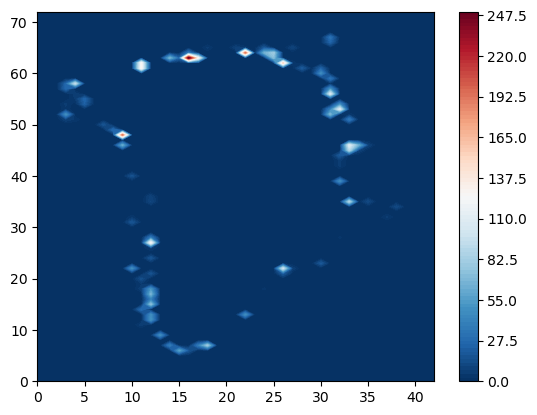

In [11]:
plt.contourf(H_lr*((H_lr > 0) & (H_orig == 0.0)), cmap = "RdBu_r", levels = 100)
plt.colorbar()

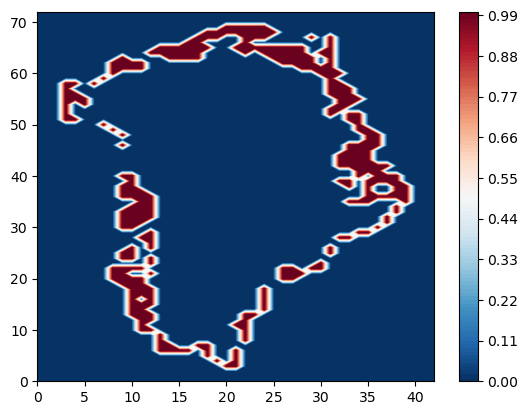

In [12]:
plt.contourf((H_lr > 0) & (H_orig == 0.0), cmap = "RdBu_r", levels = 100)
plt.colorbar()

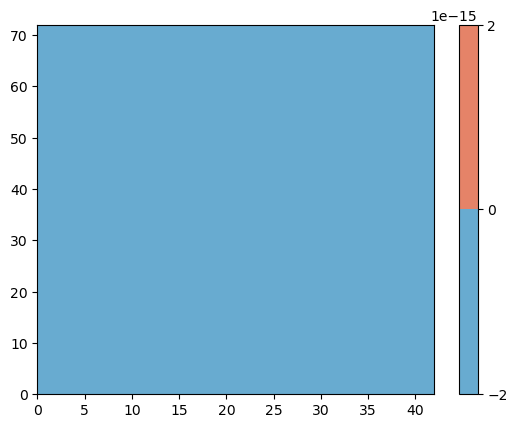

In [13]:
plt.contourf((H_lr == 0) & (H_orig > 0.0), cmap = "RdBu_r", levels = 100)
plt.colorbar()

In [14]:
zeta_data = np.arange(0,1+1./25,1./25)
zeta = np.arange(0,1+1./80,1./80)
sigma = dataCleaner.exp_sigma_level(zeta = np.arange(0,1+1./80,1./80),
                                    exponent = 2.0)

da_age_c = xr.DataArray(
        data = age_lr,
        dims = ["sigma", "y", "x"],
        coords = dict(
            sigma = zeta_data,
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="age_c in a"),
    )

da_age_c_uncert_unbounded = xr.DataArray(
        data = age_uncert_lr,
        dims = ["sigma", "y", "x"],
        coords = dict(
            sigma = zeta_data,
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="age_c_uncert in a"),
    )

da_H = xr.DataArray(
        data = H_lr,
        dims = ["y", "x"],
        coords = dict(
            y = yModel40,
            x = xModel40,
        ),  
        attrs = dict(description="Thickness in m"),
    )

ds_age_40kms = xr.Dataset(
    data_vars=dict(
        age_c=da_age_c,
        age_c_uncert_unbounded=da_age_c_uncert_unbounded,
        H=da_H
    ),
    attrs=dict(
        title="Downsampled age, uncertainty, and thickness",
        description="Processed from corrected age data on to SICOPOLIS 40 km grid",
        units="age in years, thickness in meters"
    )
)

In [15]:
ds_age_40kms["age_c"].data[-1, :, 20], \
ds_age_40kms["age_c_uncert_unbounded"].data[-1, :, 20], \
ds_age_40kms["age_c"].data[:, 15, 20], \
ds_age_40kms["age_c"].data[:, 10, 20], \
ds_age_40kms["age_c_uncert_unbounded"].data[:, 15, 20], \
ds_age_40kms["age_c_uncert_unbounded"].data[:, 10, 20], \
y_sico

(array([nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., nan, nan, nan]),
 array([nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1., nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.]),
 array([nan, nan, nan,

In [16]:
print("BEFORE BEFORE")
print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
# age_c_uncert does not exist yet, so no print_stats for it.
print_stats(ds_age_40kms["age_c_uncert_unbounded"].data, "age_uncert_lr", H_orig)

# TO RECREATE BUG, RUN FROM FIRST CELL TO HERE, OTHERWISE SOME STUFF PASSED BY REFERENCE INSTEAD OF DEEP COPYING MASKS IT.
# THIS XARRAY INTERP CALL LINE IS VERY INTERESTING
# AGE LAYERS WITH 0 ON TOP AND ONLY NANs BELOW GET TO KEEP THE ZERO ON TOP.
# AGE UNCERT LAYERS WITH 1 ON TOP AND ONLY NANs BELOW DON'T GET TO KEEP THE 1, IT BECOMES NAN AS WELL.
ds_age_40kms = ds_age_40kms.interp(sigma=sigma, method = "linear")
# IS THE ISSUE THAT I AM ENSURING FOR AGE_C THAT TOPMOST IS 0.0 IN LINE BELOW, BUT NOT DOING SO FOR AGE_C_UNCERT_UNBOUNDED?
# YES IT INDEED IS! AFTER THE THESIS IS DONE, CORRECT THIS OR AT LEAST ENSURE CONSISTENCY.
ds_age_40kms["age_c"].data[-1, :, :] = 0.0
ds_age_40kms["age_c"].data[np.isnan(ds_age_40kms["age_c"].data)] = -999.0
ds_age_40kms["age_c_uncert_unbounded"].data[np.isnan(ds_age_40kms["age_c_uncert_unbounded"].data)] = -2.e9

print("NaNs replaced by negatives")
print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
# age_c_uncert does not exist yet, so no print_stats for it.
print_stats(ds_age_40kms["age_c_uncert_unbounded"].data, "age_uncert_lr", H_orig)

# H_lr has many non-zero values that H_orig does not. Remove those.
mask_2D = (H_lr > 0) & (H_orig == 0.0)
H_lr[mask_2D] = 0.0
mask_3D = np.broadcast_to(mask_2D, ds_age_40kms["age_c"].shape)
print("H_lr masked to remove extra non-zeroes compared with H_orig")

# H_lr has a lower volume than H_orig, rescale it so that the total volume is the same
H_lr_rescale_factor = np.sum(H_orig*cell_area_model) / np.sum(H_lr*cell_area_model)
H_lr = H_lr * H_lr_rescale_factor
# Update H_lr in the dataset
ds_age_40kms["H"].data = H_lr
print("---------------")
print(f"Rescaling H_lr by a factor {H_lr_rescale_factor} to match volume with BM5 i.e. H_orig")
print("---------------")

H_orig_safe = np.where(H_orig == 0, np.nan, H_orig)  # To avoid division by zero later
print("---------------")
print(f"To avoid division by 0 later, replace zeros in H_orig by np.nan")
print("---------------")

print("---------------")
print("np.nans and negatives in H_lr masked region")
print(np.sum(np.isnan(ds_age_40kms["age_c"].data[mask_3D])), 
      np.sum(~np.isnan(ds_age_40kms["age_c"].data[mask_3D])), 
      np.sum(ds_age_40kms["age_c"].data[mask_3D] >= 0), 
      np.sum(ds_age_40kms["age_c"].data[mask_3D] < 0))
print(np.sum(np.isnan(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D])), 
      np.sum(~np.isnan(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D])), 
      np.sum(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D] > 0), 
      np.sum(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D] == 0), 
      np.sum(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D] < 0))
print("---------------")

ds_age_40kms["age_c"].data[mask_3D] = -999.0
ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D] = -2.e9

print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
# age_c_uncert does not exist yet, so no print_stats for it.
print_stats(ds_age_40kms["age_c_uncert_unbounded"].data, "age_uncert_lr", H_orig)

# Discrepancy with BM5
scale_uncert_factor_data = 1 + 4.0 * np.abs((H_lr / H_orig_safe) - 1)       # Scale uncert to account for mismatch in H values between age data and BM5
scale_uncert_factor_data = np.nan_to_num(scale_uncert_factor_data, nan=5)  # Assign 5 when original H is zero
# scale_uncert_factor_model = 1.0 - np.abs(H_orig/np.max(H_orig))*0.5      # Scale uncert to account for model representation error
# THERE IS SOME CONFUSION, BUT I AM ALMOST SURE I USED THIS SCALING FACTOR FOR THE THESIS
# I HAVE CHECKED AND IT DOES SEEM TO BE THE ONE I ACTUALLY USED
scale_uncert_factor_model = 1.0 - 0.25 * (H_orig - 2000.0) / (np.max(H_orig) - 2000.0)      # Scale uncert to account for model representation error
# scale_uncert_factor_model = 1.0 + H_orig*0.0 # Scale uncert to account for model representation error

model_uncert = scale_uncert_factor_model[None, :, :] * ds_age_40kms["age_c"].data

data_uncert = scale_uncert_factor_data[None, :, :] * ds_age_40kms["age_c_uncert_unbounded"].data.copy()
mask_invalid = data_uncert < 0
total_uncert = (model_uncert**2 + data_uncert**2)**0.5

ds_age_40kms["age_c_uncert"] = ds_age_40kms["age_c_uncert_unbounded"].copy()
ds_age_40kms["age_c_uncert"].data = total_uncert.copy()
ds_age_40kms["age_c_uncert"].data[mask_invalid] = -2.e9

print("AFTER")
print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
print_stats(ds_age_40kms["age_c_uncert"].data, "age_uncert_lr", H_orig)

# !rm /scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc
# ds_age_40kms.to_netcdf("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")

BEFORE BEFORE
age_lr stats:
  Total NaNs:  58119
  Total valid:  23495
  Nonnegative:  23495
  High-H (>= 1500) NaNs:  911
  High-H valid:  15755
  High-H >= 0:  15755
age_uncert_lr stats:
  Total NaNs:  58358
  Total valid:  23256
  Nonnegative:  23256
  High-H (>= 1500) NaNs:  1084
  High-H valid:  15582
  High-H >= 0:  15582
NaNs replaced by negatives
age_lr stats:
  Total NaNs:  0
  Total valid:  254259
  Nonnegative:  64528
  High-H (>= 1500) NaNs:  0
  High-H valid:  51921
  High-H >= 0:  47109
age_uncert_lr stats:
  Total NaNs:  0
  Total valid:  254259
  Nonnegative:  63134
  High-H (>= 1500) NaNs:  0
  High-H valid:  51921
  High-H >= 0:  46104
H_lr masked to remove extra non-zeroes compared with H_orig
---------------
Rescaling H_lr by a factor 0.9978770522493962 to match volume with BM5 i.e. H_orig
---------------
---------------
To avoid division by 0 later, replace zeros in H_orig by np.nan
---------------
---------------
np.nans and negatives in H_lr masked region
0 25353

In [17]:
ds_age_40kms["age_c"].data[-1, :, 20], \
ds_age_40kms["age_c_uncert_unbounded"].data[-1, :, 20], \
ds_age_40kms["age_c"].data[:, 15, 20], \
ds_age_40kms["age_c"].data[:, 10, 20], \
ds_age_40kms["age_c_uncert_unbounded"].data[:, 15, 20], \
ds_age_40kms["age_c_uncert_unbounded"].data[:, 10, 20], \
y_sico

(array([-9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
        -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
        -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
        -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
         0.00000000e+00,  0.00000000e+00,  1.42108547e-14,  0.00000000e+00,
         0.00000000e+00,  1.42108547e-14,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.84217094e-14,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.84217094e-14,
         2.84217094e-14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.68434189e-14,  0.00000000e+00,  0.00000000e+00,
         5.68434189e-14,  5.68434189e-14,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.13686838e-13,  0.00000000e+00,
         0.0

In [18]:
np.nanmin((ds_age_40kms['age_c_uncert_unbounded'].data/ds_age_40kms['age_c'].data)[((ds_age_40kms['age_c'].data > 0) & (ds_age_40kms['age_c_uncert_unbounded'].data > 0))]), \
np.nanmin(ds_age_correct['age_c_uncert'].data/ds_age_correct['age_c'].data)

/tmp/ipykernel_2048537/3076888299.py:1: RuntimeWarning: divide by zero encountered in divide
  np.nanmin((ds_age_40kms['age_c_uncert_unbounded'].data/ds_age_40kms['age_c'].data)[((ds_age_40kms['age_c'].data > 0) & (ds_age_40kms['age_c_uncert_unbounded'].data > 0))]), \
/tmp/ipykernel_2048537/3076888299.py:2: RuntimeWarning: divide by zero encountered in divide
  np.nanmin(ds_age_correct['age_c_uncert'].data/ds_age_correct['age_c'].data)


(0.018520786452926097, 0.039999999999999994)

In [15]:
### OLD METHOD

# print("BEFORE BEFORE")
# print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
# # age_c_uncert does not exist yet, so no print_stats for it.
# print_stats(ds_age_40kms["age_c_uncert_unbounded"].data, "age_uncert_lr", H_orig)

# ds_age_40kms = ds_age_40kms.interp(sigma=sigma, method = "linear")
# ds_age_40kms["age_c"].data[-1, :, :] = 0.0
# ds_age_40kms["age_c"].data[np.isnan(ds_age_40kms["age_c"].data)] = -999.0
# ds_age_40kms["age_c_uncert_unbounded"].data[np.isnan(ds_age_40kms["age_c_uncert_unbounded"].data)] = -2.e9

# print("NaNs replaced by negatives")
# print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
# # age_c_uncert does not exist yet
# print_stats(ds_age_40kms["age_c_uncert_unbounded"].data, "age_uncert_lr", H_orig)

# # H_lr has many non-zero values that H_orig does not. Remove those.
# mask_2D = (H_lr > 0) & (H_orig == 0.0)
# H_lr[mask_2D] = 0.0
# mask_3D = np.broadcast_to(mask_2D, ds_age_40kms["age_c"].shape)

# # H_lr has a lower volume than H_orig, rescale it so that the total volume is the same
# H_lr_rescale_factor = np.sum(H_orig*cell_area_model) / np.sum(H_lr*cell_area_model)
# H_lr = H_lr * H_lr_rescale_factor
# # Update H_lr in the dataset
# ds_age_40kms["H"].data = H_lr

# H_orig_safe = np.where(H_orig == 0, np.nan, H_orig)  # To avoid division by zero later

# print("---------------")
# print("np.nans and negatives in H_lr masked region")
# print(np.sum(np.isnan(ds_age_40kms["age_c"].data[mask_3D])), 
#       np.sum(~np.isnan(ds_age_40kms["age_c"].data[mask_3D])), 
#       np.sum(ds_age_40kms["age_c"].data[mask_3D] >= 0), 
#       np.sum(ds_age_40kms["age_c"].data[mask_3D] < 0))
# print(np.sum(np.isnan(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D])), 
#       np.sum(~np.isnan(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D])), 
#       np.sum(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D] > 0), 
#       np.sum(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D] == 0), 
#       np.sum(ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D] < 0))
# print("---------------")

# ds_age_40kms["age_c"].data[mask_3D] = -999.0
# ds_age_40kms["age_c_uncert_unbounded"].data[mask_3D] = -2.e9

# print("H_lr masked to remove extra non-zeroes compared with H_orig")
# print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
# # age_c_uncert does not exist yet
# print_stats(ds_age_40kms["age_c_uncert_unbounded"].data, "age_uncert_lr", H_orig)

# ratio = np.abs(ds_age_40kms["age_c"].data/ds_age_40kms["age_c_uncert_unbounded"].data)
# ds_age_40kms["age_c_uncert"] = ds_age_40kms["age_c_uncert_unbounded"].copy()
# ds_age_40kms["age_c_uncert"].data[ratio > 5] = 0.2*ds_age_40kms["age_c"].data[ratio > 5]

# print("After lower bound applied and before scaling factor")
# print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
# print_stats(ds_age_40kms["age_c_uncert"].data, "age_uncert_lr", H_orig)

# # Discrepancy with BM5
# scale_uncert_factor_model = 1 + np.abs((H_lr / H_orig_safe) - 1)           # Scale uncert to account for mismatch in H values between age data and BM5
# scale_uncert_factor_model = np.nan_to_num(scale_uncert_factor_model, nan=1.5)  # Assign 1.5 when original H is zero
# scale_uncert_factor_model = np.minimum(scale_uncert_factor_model, 2.0)         # Cap to max scale factor

# # Model representation error increases with decreasing H
# scale_uncert_factor_data = 5.0 - np.abs(H_orig/np.max(H_orig))*4.0    # Scale uncert to account for model representation error

# scale_uncert_factor = scale_uncert_factor_model*scale_uncert_factor_data

# ds_age_40kms["age_c_uncert"].data = ds_age_40kms["age_c_uncert"].data*scale_uncert_factor[None, :, :]

# ds_age_40kms["age_c_uncert"].data[ds_age_40kms["age_c_uncert"].data < 0] = -2.e9

# print("AFTER")
# print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)
# print_stats(ds_age_40kms["age_c_uncert"].data, "age_uncert_lr", H_orig)

# !rm /scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc
# ds_age_40kms.to_netcdf("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")

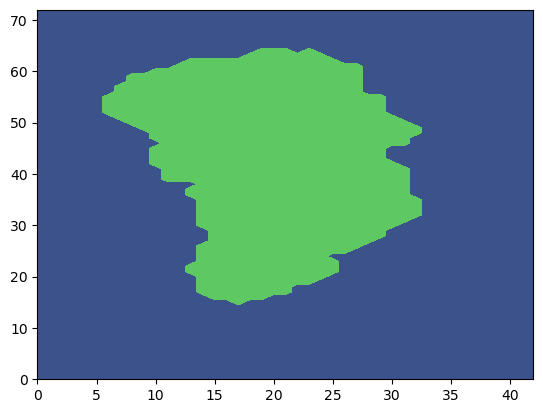

In [16]:
mask = model_uncert > data_uncert
plt.contourf((~mask_invalid[40]) & mask[40])

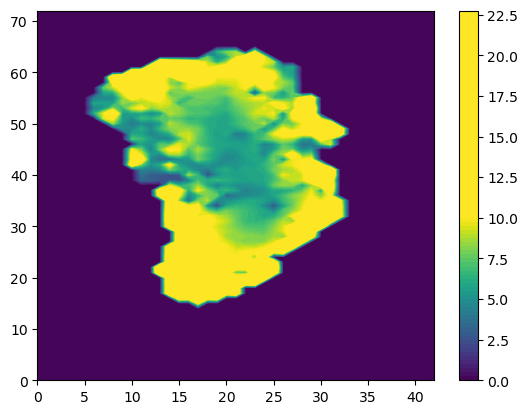

In [17]:
plt.contourf(model_uncert[40]/data_uncert[40], vmin = 0, vmax = 10, levels = 100)
plt.colorbar()

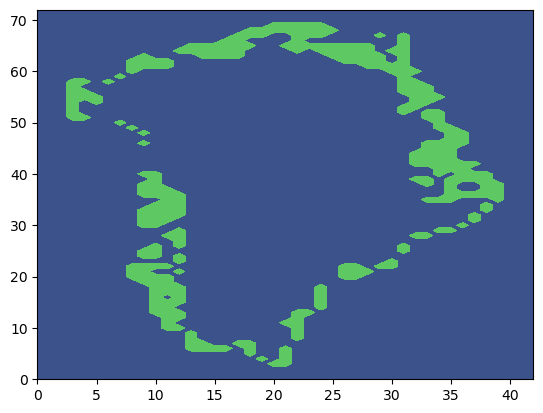

In [18]:
plt.contourf(mask_2D)

In [19]:
print_stats(ds_age_40kms["age_c"].data, "age_lr", H_orig)

age_lr stats:
  Total NaNs:  0
  Total valid:  254259
  Nonnegative:  66177
  High-H (>= 1500) NaNs:  0
  High-H valid:  51921
  High-H >= 0:  47178


In [20]:
print_stats(ds_age_40kms["age_c"].data[-1][None, :, :], "age_lr", H_orig)

age_lr stats:
  Total NaNs:  0
  Total valid:  3139
  Nonnegative:  2826
  High-H (>= 1500) NaNs:  0
  High-H valid:  641
  High-H >= 0:  641


In [21]:
print_stats(ds_age_40kms["age_c"].data[-2][None, :, :], "age_lr", H_orig)

age_lr stats:
  Total NaNs:  0
  Total valid:  3139
  Nonnegative:  870
  High-H (>= 1500) NaNs:  0
  High-H valid:  641
  High-H >= 0:  621


In [22]:
print_stats(ds_age_40kms["age_c"].data[40][None, :, :], "age_lr", H_orig)

age_lr stats:
  Total NaNs:  0
  Total valid:  3139
  Nonnegative:  848
  High-H (>= 1500) NaNs:  0
  High-H valid:  641
  High-H >= 0:  619


In [23]:
print_stats(ds_age_40kms["age_c"].data[1][None, :, :], "age_lr", H_orig)

age_lr stats:
  Total NaNs:  0
  Total valid:  3139
  Nonnegative:  610
  High-H (>= 1500) NaNs:  0
  High-H valid:  641
  High-H >= 0:  473


In [24]:
print_stats(ds_age_40kms["age_c"].data[0][None, :, :], "age_lr", H_orig)

age_lr stats:
  Total NaNs:  0
  Total valid:  3139
  Nonnegative:  610
  High-H (>= 1500) NaNs:  0
  High-H valid:  641
  High-H >= 0:  473


In [25]:
print_stats(ds_age_40kms["age_c_uncert"].data, "age_uncert_lr", H_orig)

age_uncert_lr stats:
  Total NaNs:  0
  Total valid:  254259
  Nonnegative:  62764
  High-H (>= 1500) NaNs:  0
  High-H valid:  51921
  High-H >= 0:  46104


In [26]:
np.sum(H_lr*cell_area_model), np.sum(H_orig*cell_area_model), np.sum(H_model*cell_area_model)

(2978792016445440.0, 2978792000000000.0, 2967522800000000.0)

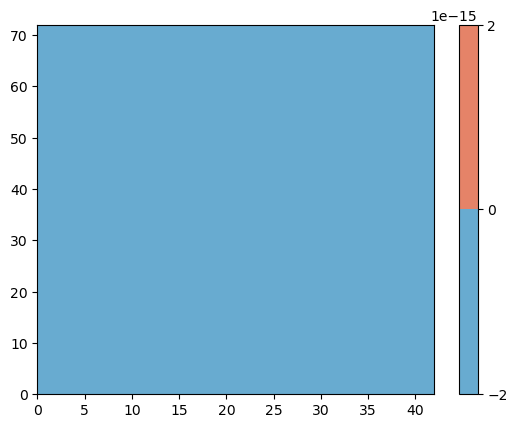

In [27]:
plt.contourf(H_lr*((H_lr > 0) & (H_orig == 0.0)), cmap = "RdBu_r", levels = 100)
plt.colorbar()

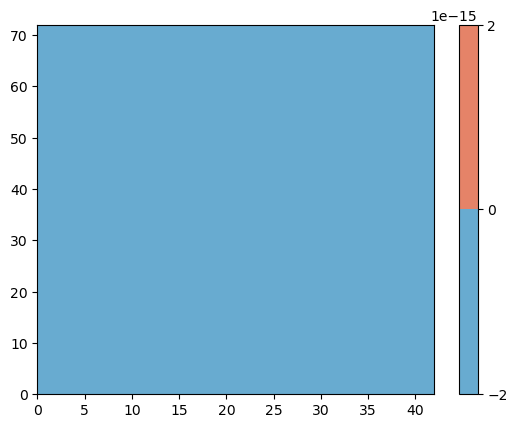

In [28]:
plt.contourf((H_lr > 0) & (H_orig == 0.0), cmap = "RdBu_r", levels = 100)
plt.colorbar()

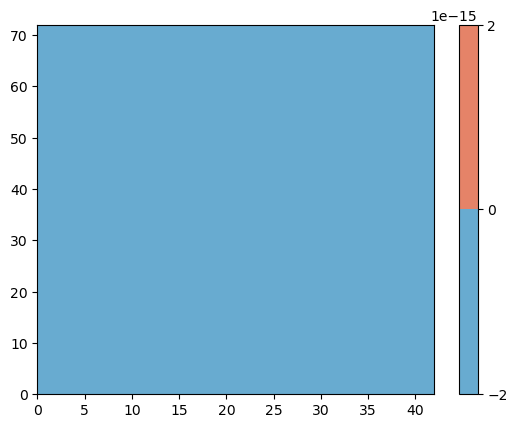

In [29]:
plt.contourf((H_lr == 0) & (H_orig > 0.0), cmap = "RdBu_r", levels = 100)
plt.colorbar()

In [30]:
np.min(scale_uncert_factor_model), np.max(scale_uncert_factor_model)

(0.19999999, 1.0)

In [31]:
np.min(scale_uncert_factor_data), np.max(scale_uncert_factor_data)

(1.0000159483753008, 6.075152685276018)

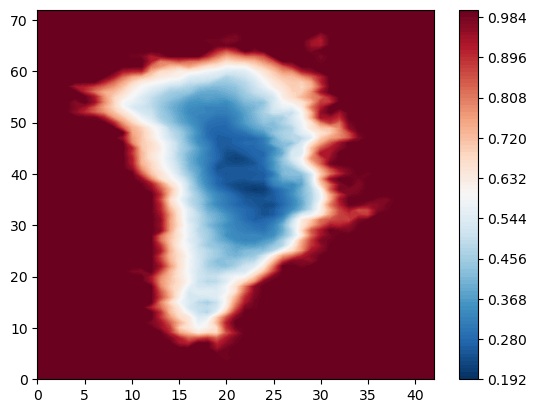

In [32]:
plt.contourf(scale_uncert_factor_model, cmap = "RdBu_r", levels = 100)
plt.colorbar()

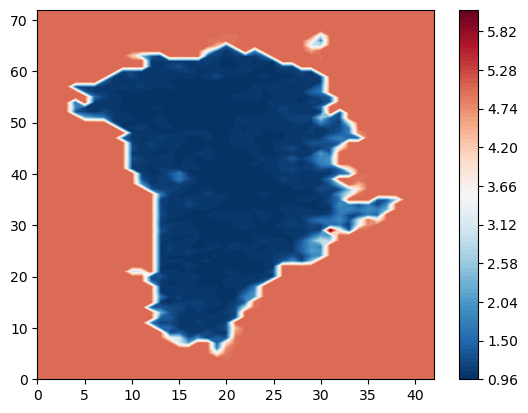

In [33]:
plt.contourf(scale_uncert_factor_data, cmap = "RdBu_r", levels = 100)
plt.colorbar()

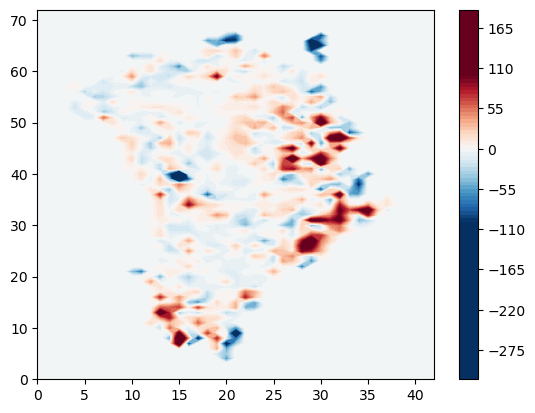

In [34]:
plt.contourf(H_lr-H_orig, cmap = "RdBu_r", vmin = -100, vmax = 100, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/493095672.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((H_lr/H_orig-1)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


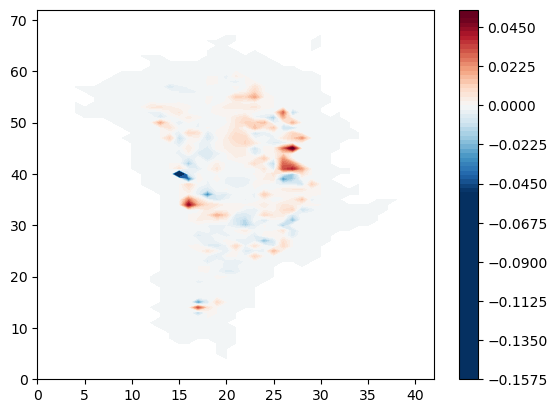

In [35]:
plt.contourf((H_lr/H_orig-1)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/1138084166.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.1)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


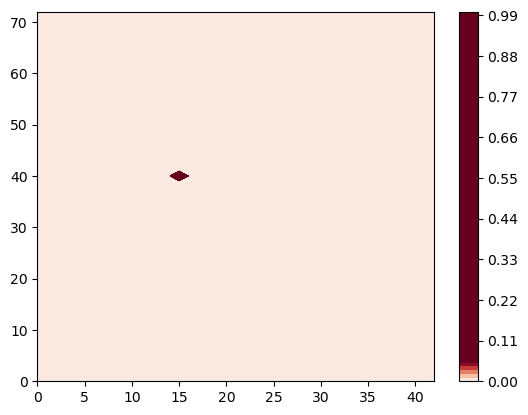

In [36]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.1)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/2445572989.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.05)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


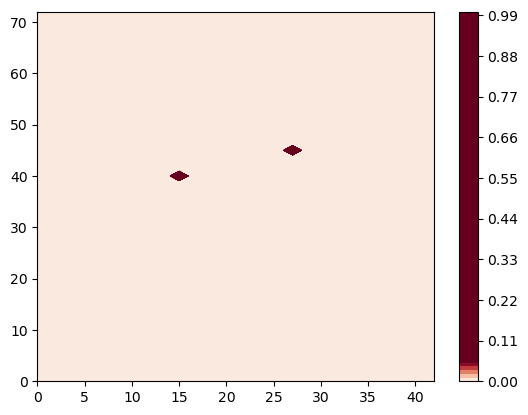

In [60]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.05)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/1019820015.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.04)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


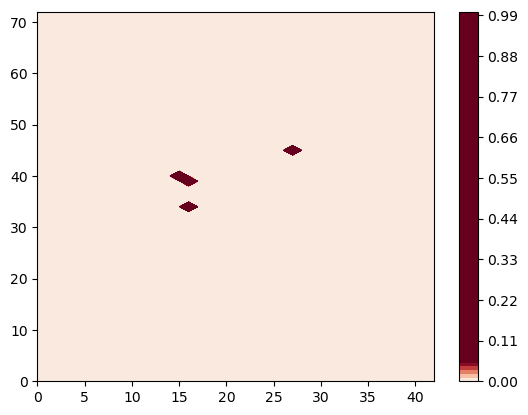

In [62]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.04)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/3071937226.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.03)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


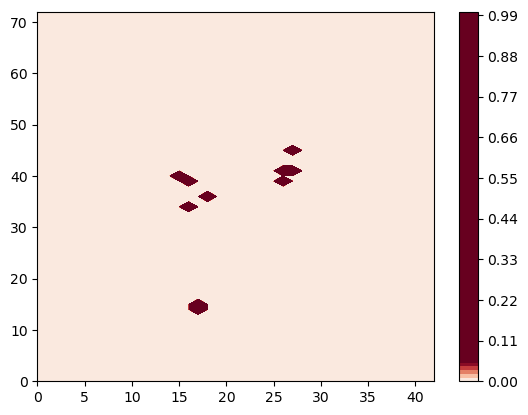

In [63]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.03)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/2939255552.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.02)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


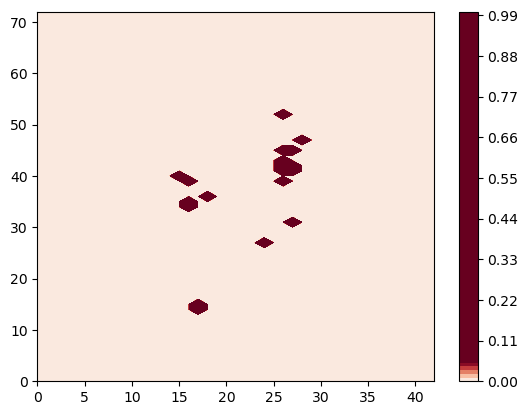

In [64]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.02)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/1984716145.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.01)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


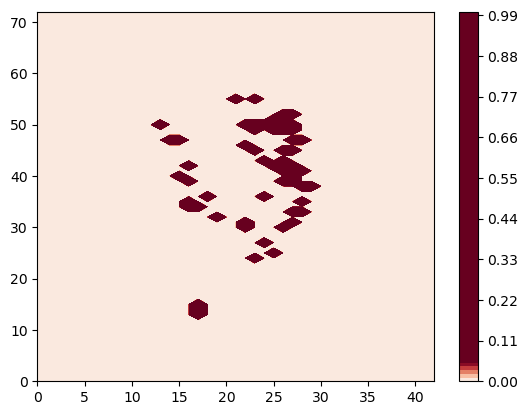

In [65]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.01)*(H_orig >= 2000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/1504520884.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((H_lr/H_orig-1)*(H_orig >= 1500.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


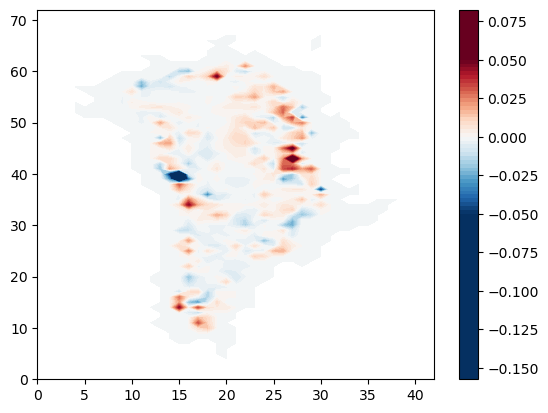

In [37]:
plt.contourf((H_lr/H_orig-1)*(H_orig >= 1500.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/3351736325.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.1)*(H_orig >= 1500.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


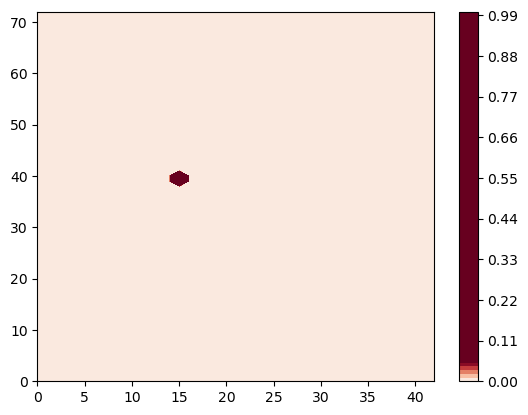

In [38]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.1)*(H_orig >= 1500.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/1338082946.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((H_lr/H_orig-1)*(H_orig >= 1000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


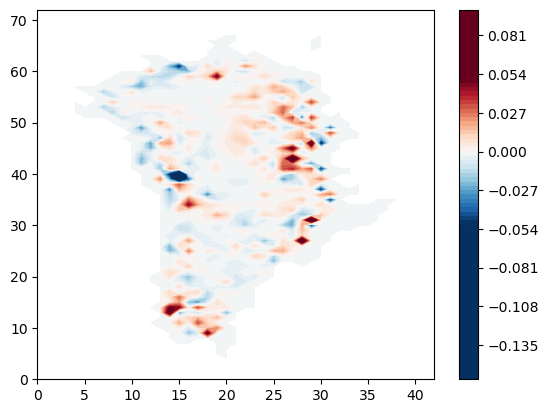

In [39]:
plt.contourf((H_lr/H_orig-1)*(H_orig >= 1000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/139110536.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.1)*(H_orig >= 1000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


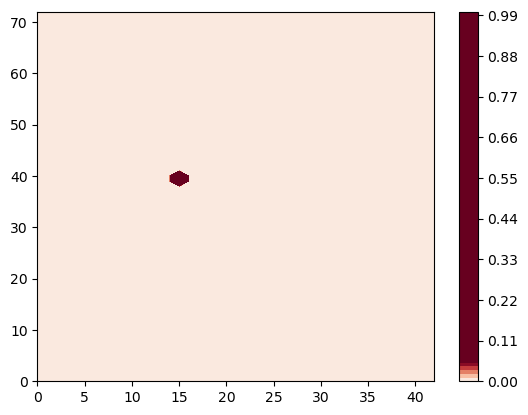

In [40]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.1)*(H_orig >= 1000.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/3579981244.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((H_lr/H_orig-1)*(H_orig >= 500.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


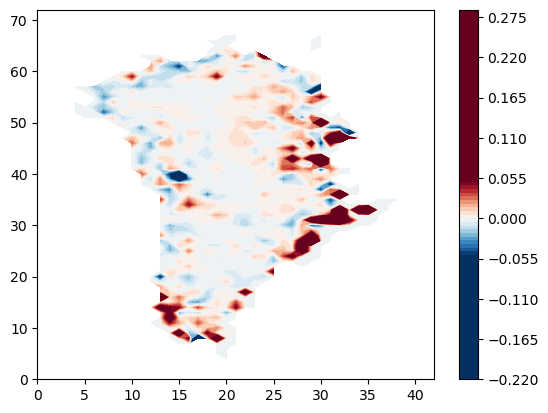

In [41]:
plt.contourf((H_lr/H_orig-1)*(H_orig >= 500.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

/tmp/ipykernel_3187613/446218043.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((np.abs((H_lr/H_orig-1))>= 0.1)*(H_orig >= 500.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)


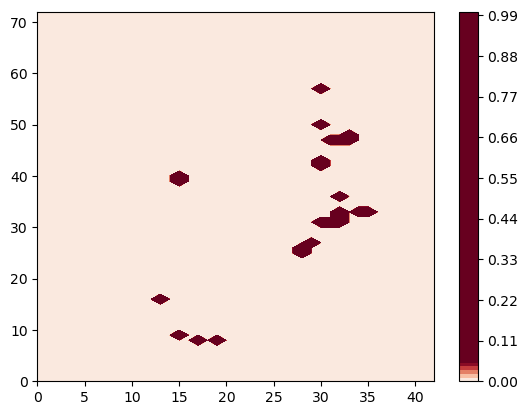

In [42]:
plt.contourf((np.abs((H_lr/H_orig-1))>= 0.1)*(H_orig >= 500.0), cmap = "RdBu_r", vmin = -0.05, vmax = 0.05, levels = 100)
plt.colorbar()

In [43]:
mask = (ds_age_40kms["age_c_uncert"].data < 0) & (ds_age_40kms["age_c"].data > 0)
np.sum(mask)

1457

In [44]:
mask = (ds_age_40kms["age_c_uncert"].data > 0) & (ds_age_40kms["age_c"].data < 0)
np.sum(mask)

0

In [45]:
mask = (ds_age_40kms["age_c_uncert"].data < 0) & (ds_age_40kms["age_c"].data < 0)
np.sum(mask)

188082

In [46]:
mask = (ds_age_40kms["age_c_uncert"].data > 0) & (ds_age_40kms["age_c"].data > 0)
np.sum(mask), np.nanmax(ds_age_40kms["age_c"].data / ds_age_40kms["age_c_uncert"].data * mask), np.nanmin(ds_age_40kms["age_c"].data / ds_age_40kms["age_c_uncert"].data * mask)

(61894, 4.925739114305366, -0.0)

In [47]:
mask = ds_age_40kms["age_c_uncert"].data == 0.0
np.sum(mask)

0

In [48]:
np.sum(H_orig >= 500.0), np.sum(H_orig >= 1000.0), np.sum(H_orig >= 1500.0), np.sum(H_orig >= 2000.0)

(925, 805, 641, 457)

/tmp/ipykernel_3187613/3686174097.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.contourf((H_model/H_orig-1)*(H_orig >= 500.0), cmap = "RdBu_r", vmin = -1.0, vmax = 1.0, levels = 100)
/tmp/ipykernel_3187613/3686174097.py:1: RuntimeWarning: invalid value encountered in divide
  plt.contourf((H_model/H_orig-1)*(H_orig >= 500.0), cmap = "RdBu_r", vmin = -1.0, vmax = 1.0, levels = 100)
/tmp/ipykernel_3187613/3686174097.py:1: RuntimeWarning: invalid value encountered in multiply
  plt.contourf((H_model/H_orig-1)*(H_orig >= 500.0), cmap = "RdBu_r", vmin = -1.0, vmax = 1.0, levels = 100)


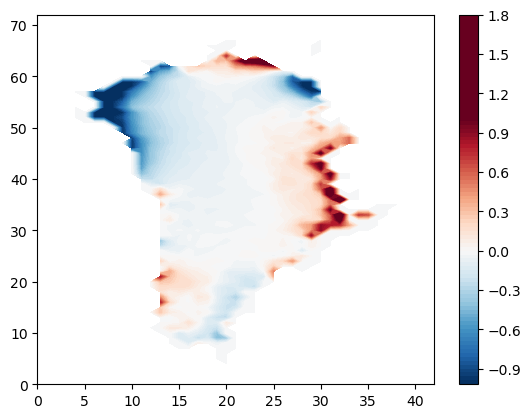

In [49]:
plt.contourf((H_model/H_orig-1)*(H_orig >= 500.0), cmap = "RdBu_r", vmin = -1.0, vmax = 1.0, levels = 100)
plt.colorbar()

In [50]:
np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig > 10))/np.sum(H_orig > 10), \
np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig >= 500.0))/np.sum(H_orig >= 500.0), \
np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig >= 1000.0))/np.sum(H_orig >= 1000.0), \
np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig >= 1500.0))/np.sum(H_orig >= 1500.0), \
np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig >= 2000.0))/np.sum(H_orig >= 2000.0)

/tmp/ipykernel_3187613/2811135039.py:1: RuntimeWarning: divide by zero encountered in divide
  np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig > 10))/np.sum(H_orig > 10), \
/tmp/ipykernel_3187613/2811135039.py:1: RuntimeWarning: invalid value encountered in divide
  np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig > 10))/np.sum(H_orig > 10), \
/tmp/ipykernel_3187613/2811135039.py:2: RuntimeWarning: divide by zero encountered in divide
  np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig >= 500.0))/np.sum(H_orig >= 500.0), \
/tmp/ipykernel_3187613/2811135039.py:2: RuntimeWarning: invalid value encountered in divide
  np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig >= 500.0))/np.sum(H_orig >= 500.0), \
/tmp/ipykernel_3187613/2811135039.py:3: RuntimeWarning: divide by zero encountered in divide
  np.sum((np.abs(H_model/H_orig-1)>0.1)*(H_orig >= 1000.0))/np.sum(H_orig >= 1000.0), \
/tmp/ipykernel_3187613/2811135039.py:3: RuntimeWarning: invalid value encountered in divide
  np.sum((np.abs(H_model/H_or

(0.5591397849462365,
 0.46918918918918917,
 0.40993788819875776,
 0.31513260530421217,
 0.22319474835886213)

/tmp/ipykernel_3187613/661348081.py:3: RuntimeWarning: divide by zero encountered in divide
  rel_error = np.abs(H_model / H_true - 1)
/tmp/ipykernel_3187613/661348081.py:3: RuntimeWarning: invalid value encountered in divide
  rel_error = np.abs(H_model / H_true - 1)


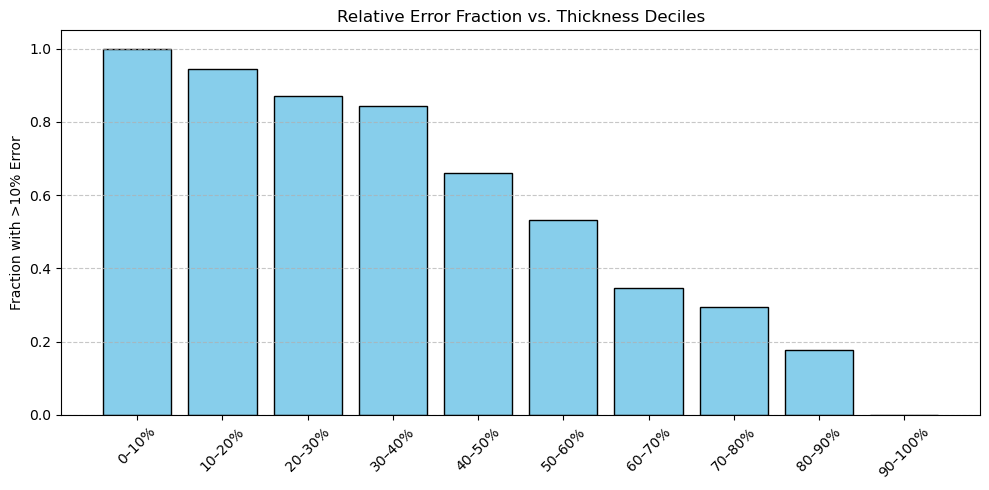

In [51]:
H_true = H_orig.copy()
H_max = np.max(H_true)
rel_error = np.abs(H_model / H_true - 1)
bins = np.linspace(0, H_max, 11)

labels = []
fractions = []

for i in range(10):
    lower = bins[i]
    upper = bins[i+1]
    mask = (H_true > lower) & (H_true <= upper)
    if np.sum(mask) == 0:
        labels.append(f"{int(lower/H_max*100)}–{int(upper/H_max*100)}%")
        fractions.append(np.nan)
        continue
    bad = (rel_error > 0.1) & mask
    fraction = np.sum(bad) / np.sum(mask)
    labels.append(f"{int(lower/H_max*100)}–{int(upper/H_max*100)}%")
    fractions.append(fraction)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(labels, fractions, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Fraction with >10% Error')
plt.title('Relative Error Fraction vs. Thickness Deciles')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

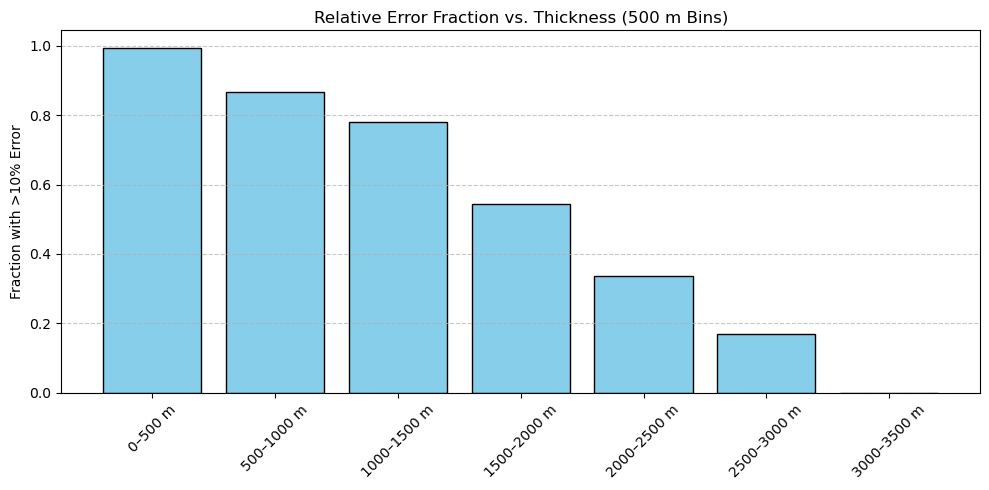

In [52]:
# Define new bins in 500 m intervals
bin_edges = np.arange(0, np.max(H_true) + 500, 500)

# Redo labels and fractions based on new bins
labels_fixed = []
fractions_fixed = []

for i in range(len(bin_edges) - 1):
    lower = bin_edges[i]
    upper = bin_edges[i + 1]
    mask = (H_true > lower) & (H_true <= upper)
    if np.sum(mask) == 0:
        labels_fixed.append(f"{int(lower)}–{int(upper)} m")
        fractions_fixed.append(np.nan)
        continue
    bad = (rel_error > 0.1) & mask
    fraction = np.sum(bad) / np.sum(mask)
    labels_fixed.append(f"{int(lower)}–{int(upper)} m")
    fractions_fixed.append(fraction)

# Plotting new bins
plt.figure(figsize=(10, 5))
plt.bar(labels_fixed, fractions_fixed, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Fraction with >10% Error')
plt.title('Relative Error Fraction vs. Thickness (500 m Bins)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

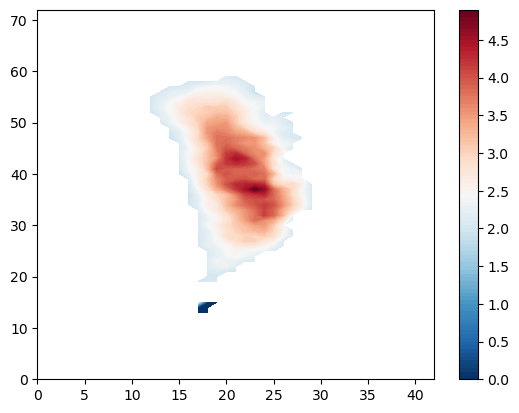

In [53]:
mask = np.where(H_orig >= 2000.0, 1.0, np.nan)

plt.contourf(ds_age_40kms["age_c"].data[40]/ds_age_40kms["age_c_uncert"].data[40]*mask*(ds_age_40kms["age_c_uncert"].data[40] >= 0), cmap = "RdBu_r", levels = 100)
plt.colorbar()

In [54]:
ds_age_40kms["age_c"][:,12,17]

<xarray.DataArray 'age_c' (sigma: 81)> Size: 648B
array([-999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999.,    0.])
Coordinates:
    y        float64 8B -2.97e+03
    x        float64 8B -40.0
  * sigma    (sigma) float64 648B 0.0 0.003962 0.008025 ... 0.9436 0.9714 1.0
Attributes:
    description:  age_c in a

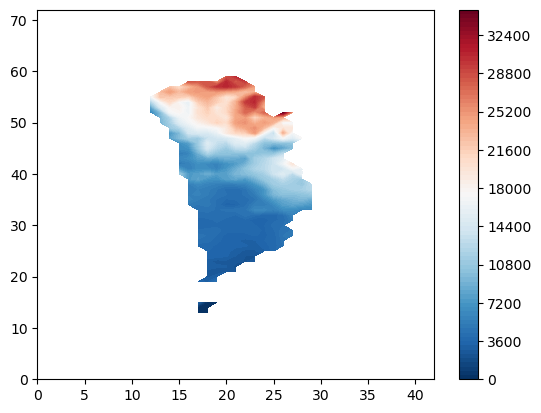

In [55]:
mask = np.where(H_orig >= 2000.0, 1.0, np.nan)

plt.contourf(ds_age_40kms["age_c_uncert"].data[40]*mask*(ds_age_40kms["age_c_uncert"].data[40] >= 0), cmap = "RdBu_r", levels = 100)
plt.colorbar()

In [56]:
np.sum(ds_age_40kms["age_c"].data > 134000.0), \
np.sum(ds_age_40kms["age_c"].data <= 134000.0) - np.sum(ds_age_40kms["age_c"].data < 0.0), \
np.sum(ds_age_40kms["age_c"].data <= 130000.0) - np.sum(ds_age_40kms["age_c"].data < 0.0), \
np.sum(ds_age_40kms["age_c"].data <= 60000.0) - np.sum(ds_age_40kms["age_c"].data < 0.0), \
np.sum(ds_age_40kms["age_c"].data <= 11000.0) - np.sum(ds_age_40kms["age_c"].data < 0.0)

(1737, 64440, 64126, 53732, 31832)

In [57]:
np.sum(H_orig >= 1500.0)/np.sum(H_orig > 0), \
np.sum(H_lr >= 1500.0)/np.sum(H_lr > 0)

(0.5728328865058088, 0.5737265415549598)

In [58]:
np.sum(H_orig > 0), np.sum(H_lr > 0)

(1119, 1119)

In [59]:
np.sum((ds_age_40kms["age_c"].data > 134000.0)*(H_orig >= 1500.0)[None, :, :]), \
np.sum((ds_age_40kms["age_c"].data <= 134000.0)*(H_orig >= 1500.0)[None, :, :]) - np.sum((ds_age_40kms["age_c"].data < 0.0)*(H_orig >= 1500.0)[None, :, :]), \
np.sum((ds_age_40kms["age_c"].data <= 130000.0)*(H_orig >= 1500.0)[None, :, :]) - np.sum((ds_age_40kms["age_c"].data < 0.0)*(H_orig >= 1500.0)[None, :, :]), \
np.sum((ds_age_40kms["age_c"].data <= 60000.0)*(H_orig >= 1500.0)[None, :, :]) - np.sum((ds_age_40kms["age_c"].data < 0.0)*(H_orig >= 1500.0)[None, :, :]), \
np.sum((ds_age_40kms["age_c"].data <= 11000.0)*(H_orig >= 1500.0)[None, :, :]) - np.sum((ds_age_40kms["age_c"].data < 0.0)*(H_orig >= 1500.0)[None, :, :])

(1679, 45499, 45195, 36247, 20361)